# 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出してください。

In [382]:
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
warnings.simplefilter("ignore")
data = pd.read_csv("../week3/train.csv")
label = ["GrLivArea","YearBuilt","SalePrice"]
df = data.loc[:,label]
display(df.head())

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


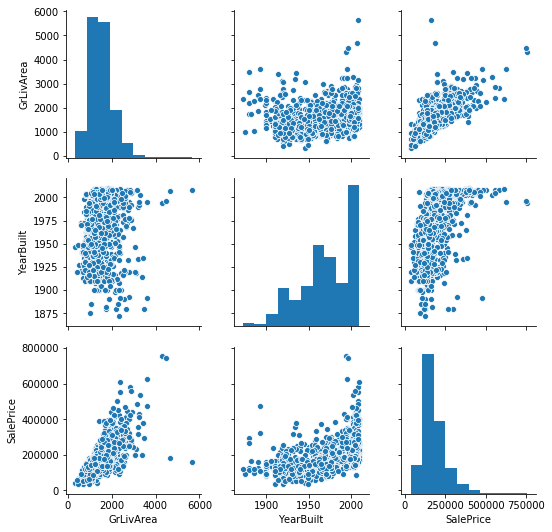

In [365]:
#散布図行列
sns.pairplot(df)
plt.show()

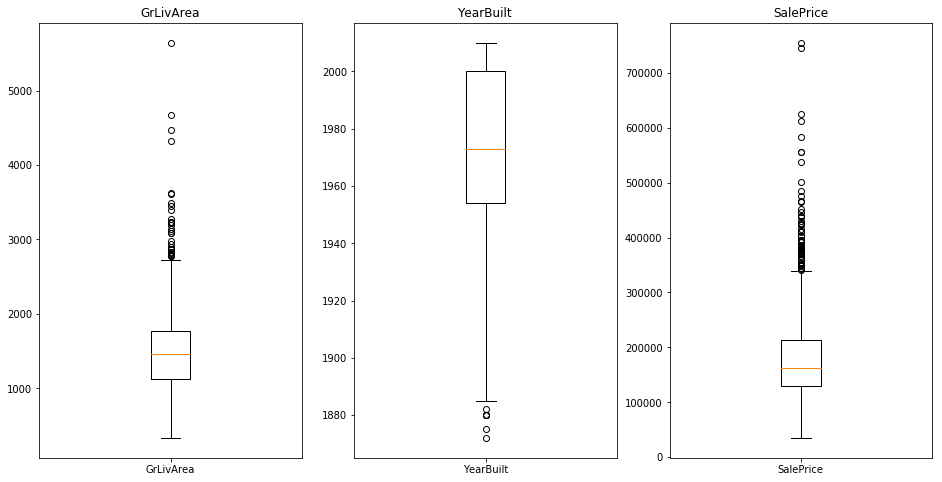

In [366]:
#箱ひげ図
fig,ax = plt.subplots(1,3,figsize = (16,8))
for i in range(3):
    ax[i].set_title(label[i])
    ax[i].boxplot(df.iloc[:,i],labels = [label[i]])

plt.show()

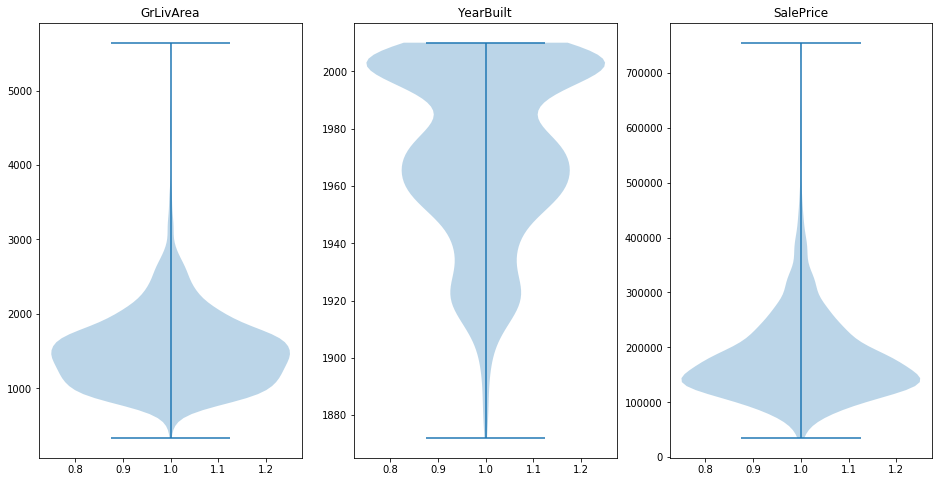

In [367]:
#バイオリン図
fig,ax = plt.subplots(1,3,figsize = (16,8))
for i in range(3):
    ax[i].set_title(label[i])
    ax[i].violinplot(df.iloc[:,i])
plt.show()

In [368]:
#検証用データと訓練用データに分け、訓練用データを用いて標準化
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,0:2],df.SalePrice,train_size = 0.8,random_state=1)
scaler_x = StandardScaler()
scaler_y = StandardScaler()
scaler_x.fit(x_train)
scaler_y.fit(y_train[:,np.newaxis])

x_train_std = scaler_x.transform(x_train)
x_test_std = scaler_x.transform(x_test)
y_train_std = scaler_y.transform(y_train[:,np.newaxis]).flatten()
y_test_std = scaler_y.transform(y_test[:,np.newaxis]).flatten()

In [369]:
#線形回帰を行い、学習、推定、評価まで
lr = LinearRegression()
lr.fit(x_train_std,y_train_std)  #学習
y_pred = lr.predict(x_test_std)  #推定
print("平均二乗誤差：{}".format(mean_squared_error(y_test_std, y_pred)))

平均二乗誤差：0.32831698257182


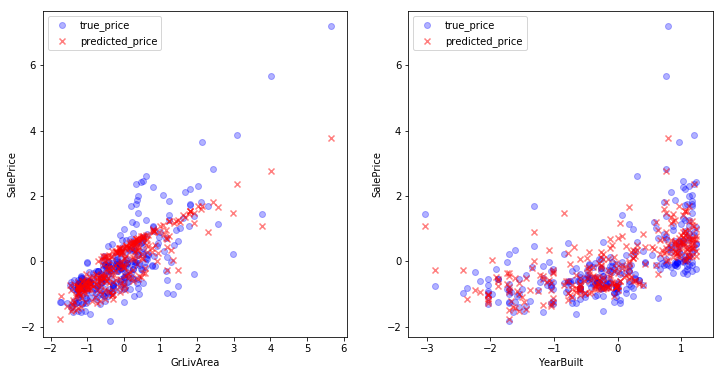

In [370]:
#グラフを用いて可視化
fig,ax = plt.subplots(1,2,figsize=(12,6))
for i in range(2):
    ax[i].set_xlabel(df.keys()[i])
    ax[i].set_ylabel("SalePrice")
    ax[i].scatter(x_test_std[:,i],y_test_std,color = "b",alpha = 0.3,label = "true_price")
    ax[i].scatter(x_test_std[:,i],y_pred,color = "r",alpha = 0.5,label = "predicted_price",marker = "x")
    ax[i].legend()
plt.show()

# 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

線形回帰  
SVM  
決定木  
ランダムフォレスト

In [371]:
#線形回帰
values = np.empty(4)
values[0] = mean_squared_error(y_test_std, y_pred)

平均二乗誤差：0.4002416480067784


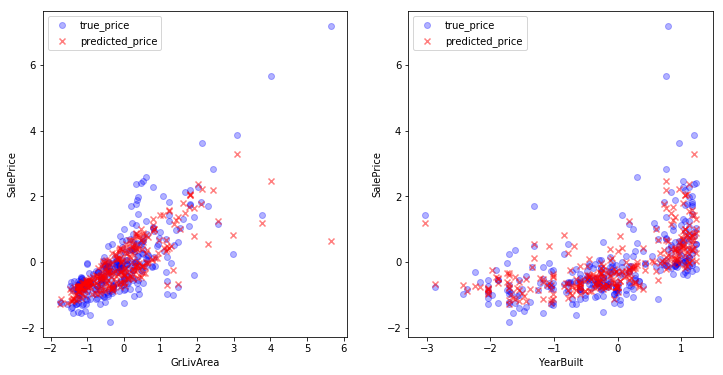

In [372]:
#SVM
svr = svm.SVR()
svr.fit(x_train_std,y_train_std)
y_pred2 = svr.predict(x_test_std)
values[1] = mean_squared_error(y_test_std, y_pred2)
print("平均二乗誤差：{}".format(mean_squared_error(y_test_std, y_pred2)))

#可視化
fig,ax = plt.subplots(1,2,figsize=(12,6))
for i in range(2):
    ax[i].set_xlabel(df.keys()[i])
    ax[i].set_ylabel("SalePrice")
    ax[i].scatter(x_test_std[:,i],y_test_std,color = "b",alpha = 0.3,label = "true_price")
    ax[i].scatter(x_test_std[:,i],y_pred2,color = "r",alpha = 0.5,label = "predicted_price",marker = "x")
    ax[i].legend()
plt.show()

平均二乗誤差：0.4002416480067784


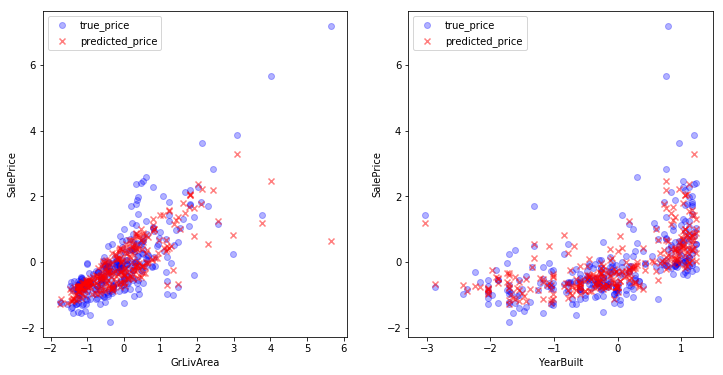

In [373]:
#決定木
dt = DecisionTreeRegressor()
dt.fit(x_train_std,y_train_std)

y_pred3 = svr.predict(x_test_std)
values[2] = mean_squared_error(y_test_std, y_pred3)
print("平均二乗誤差：{}".format(mean_squared_error(y_test_std, y_pred3)))

#可視化
fig,ax = plt.subplots(1,2,figsize=(12,6))
for i in range(2):
    ax[i].set_xlabel(df.keys()[i])
    ax[i].set_ylabel("SalePrice")
    ax[i].scatter(x_test_std[:,i],y_test_std,color = "b",alpha = 0.3,label = "true_price")
    ax[i].scatter(x_test_std[:,i],y_pred3,color = "r",alpha = 0.5,label = "predicted_price",marker = "x")
    ax[i].legend()
plt.show()

平均二乗誤差：0.4002416480067784


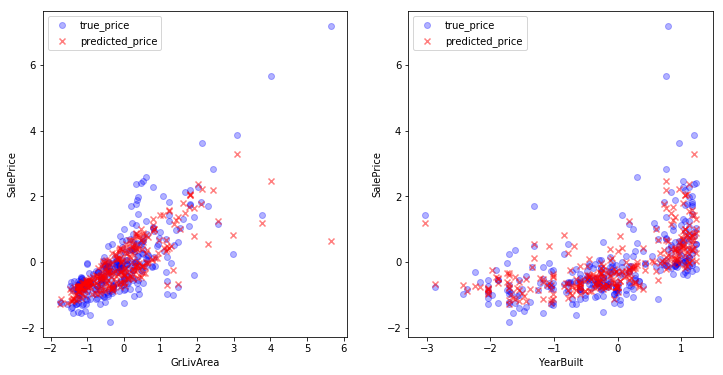

In [374]:
#ランダムフォレスト
rf = RandomForestRegressor()
rf.fit(x_train_std,y_train_std)

y_pred4 = svr.predict(x_test_std)
values[3] = mean_squared_error(y_test_std, y_pred4)
print("平均二乗誤差：{}".format(mean_squared_error(y_test_std, y_pred4)))

#可視化
fig,ax = plt.subplots(1,2,figsize=(12,6))
for i in range(2):
    ax[i].set_xlabel(df.keys()[i])
    ax[i].set_ylabel("SalePrice")
    ax[i].scatter(x_test_std[:,i],y_test_std,color = "b",alpha = 0.3,label = "true_price")
    ax[i].scatter(x_test_std[:,i],y_pred4,color = "r",alpha = 0.5,label = "predicted_price",marker = "x")
    ax[i].legend()
plt.show()

In [398]:
#指標値の表
value_data = pd.DataFrame(values,index = ["Linear Regression","SVR","Decision Tree Regressor","Random Forest Regressor"],columns = ["Mean Squared Error"])
display(value_data)

,Mean Squared Error
Linear Regression,0.328317
SVR,0.400242
Decision Tree Regressor,0.400242
Random Forest Regressor,0.400242


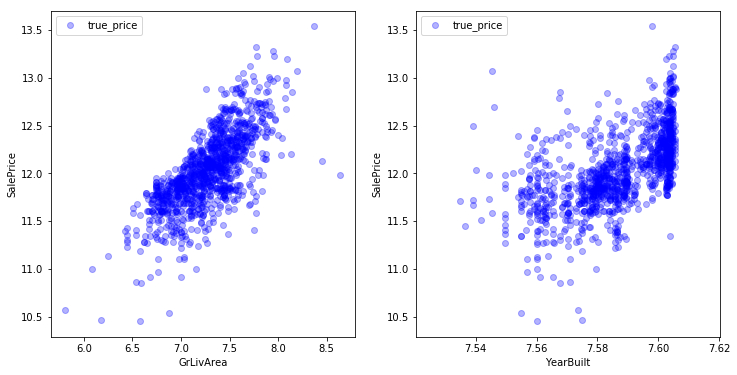

In [376]:
#グラフを用いて可視化
fig,ax = plt.subplots(1,2,figsize=(12,6))
for i in range(2):
    ax[i].set_xlabel(df.keys()[i])
    ax[i].set_ylabel("SalePrice")
    ax[i].scatter(x_train.iloc[:,i].apply(np.log),y_train.apply(np.log),color = "b",alpha = 0.3,label = "true_price")
    #ax[i].scatter(x_train[:,i],y_pred,color = "r",alpha = 0.5,label = "predicted_price",marker = "x")
    ax[i].legend()
plt.show()

In [392]:
#目的変数との相関の高い特徴量10個を選ぶ
df2 = pd.DataFrame(data)
sorted_corr_name = df2.corr().sort_values(by = "SalePrice",ascending=False).SalePrice.index[1:11]  #ここの相関係数行列をソートする作業から！
X2 = df2[sorted_corr_name]

x_train,x_test,y_train,y_test = train_test_split(X2,df.SalePrice,train_size = 0.8,random_state=1)

scaler_x = StandardScaler()
scaler_y = StandardScaler()
scaler_x.fit(x_train)
scaler_y.fit(y_train[:,np.newaxis])

#標準化
x_train_std = scaler_x.transform(x_train)
x_test_std = scaler_x.transform(x_test)
y_train_std = scaler_y.transform(y_train[:,np.newaxis]).flatten()
y_test_std = scaler_y.transform(y_test[:,np.newaxis]).flatten()

In [400]:
model_1 = LinearRegression() # 線形回帰
model_2 = svm.SVR()  #SVM
model_3 = DecisionTreeRegressor()  #決定木
model_4 = RandomForestRegressor() # ランダムフォレスト回帰

model_1.fit(x_train_std, y_train_std)
model_2.fit(x_train_std, y_train_std)
model_3.fit(x_train_std, y_train_std)
model_4.fit(x_train_std,y_train_std)

# 結果の検証 
test_pred_1 = model_1.predict(x_test_std)
test_pred_2 = model_2.predict(x_test_std)
test_pred_3 = model_3.predict(x_test_std)
test_pred_4 = model_4.predict(x_test_std)

#　各モデル個別の予測精度を平均二乗誤差で確認
print ("線形回帰の平均2乗誤差: {:.4f}".format(mean_squared_error(y_test_std, test_pred_1)))
print ("SVMの平均2乗誤差: {:.4f}".format(mean_squared_error(y_test_std, test_pred_2)))
print ("決定木の平均2乗誤差: {:.4f}".format(mean_squared_error(y_test_std, test_pred_3)))
print ("ランダムフォレスト回帰の平均2乗誤差: {:.4f}".format(mean_squared_error(y_test_std, test_pred_4)))

線形回帰の平均2乗誤差: 0.2183
SVMの平均2乗誤差: 0.2128
決定木の平均2乗誤差: 0.2146
ランダムフォレスト回帰の平均2乗誤差: 0.1152
